In [40]:
import numpy as np

class ScratchLogisticRegression:
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    bias : bool
      True if a bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters (weights)
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record losses on validation data
    """

    def __init__(self, num_iter, lr, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0
        self.loss = None
        self.val_loss = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logistic_regression_assumption(self, X):
        """
        Logistic regression assumption function: h_theta(x) = 1 / (1 + exp(-theta^T . x))

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted probabilities
        """
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def compute_loss(self, y, y_pred):
        m = y.shape[0]
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize weights
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        if self.bias:
            self.intercept_ = 0

        # Prepare to record loss
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            # Linear combination
            linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
            
            # Predicted probabilities
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples if self.bias else 0

            # Update parameters
            self.coef_ -= self.lr * dw
            if self.bias:
                self.intercept_ -= self.lr * db

            # Calculate and record the loss
            self.loss[i] = self.compute_loss(y, y_pred)

            # Validation loss
            if X_val is not None:
                linear_model_val = np.dot(X_val, self.coef_) + (self.intercept_ if self.bias else 0)
                y_val_pred = self.sigmoid(linear_model_val)
                self.val_loss[i] = self.compute_loss(y_val, y_val_pred)

            if self.verbose:
                print(f"Iteration {i + 1}/{self.num_iter}, Loss: {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict_proba(self, X):
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)


In [41]:
import numpy as np

class ScratchLogisticRegression:
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    bias : bool
      True if a bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters (weights)
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record losses on validation data
    """

    def __init__(self, num_iter, lr, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0
        self.loss = None
        self.val_loss = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logistic_regression_assumption(self, X):
        """
        Logistic regression assumption function: h_theta(x) = 1 / (1 + exp(-theta^T . x))

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted probabilities
        """
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def compute_loss(self, y, y_pred):
        m = y.shape[0]
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    def _gradient_descent(self, X, y, y_pred, reg_param=0):
        """
        Perform one step of gradient descent to update parameters.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            True labels
        y_pred : ndarray, shape (n_samples,)
            Predicted probabilities
        reg_param : float, default=0
            Regularization parameter (lambda)
        """
        m, n = X.shape

        # Compute gradients
        dw = np.dot(X.T, (y_pred - y)) / m
        if reg_param > 0:
            dw[1:] += (reg_param / m) * self.coef_[1:]
        db = np.sum(y_pred - y) / m if self.bias else 0

        # Update weights
        self.coef_ -= self.lr * dw
        if self.bias:
            self.intercept_ -= self.lr * db

    def fit(self, X, y, X_val=None, y_val=None, reg_param=0):
        # Initialize weights
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        if self.bias:
            self.intercept_ = 0

        # Prepare to record loss
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            # Predicted probabilities
            y_pred = self.logistic_regression_assumption(X)

            # Gradient descent step
            self._gradient_descent(X, y, y_pred, reg_param)

            # Calculate and record the loss
            self.loss[i] = self.compute_loss(y, y_pred)

            # Validation loss
            if X_val is not None:
                y_val_pred = self.logistic_regression_assumption(X_val)
                self.val_loss[i] = self.compute_loss(y_val, y_val_pred)

            if self.verbose:
                print(f"Iteration {i + 1}/{self.num_iter}, Loss: {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict_proba(self, X):
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)


In [42]:
import numpy as np

class ScratchLogisticRegression:
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    bias : bool
      True if a bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters (weights)
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record losses on validation data
    """

    def __init__(self, num_iter, lr, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0
        self.loss = None
        self.val_loss = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logistic_regression_assumption(self, X):
        """
        Logistic regression assumption function: h_theta(x) = 1 / (1 + exp(-theta^T . x))

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted probabilities
        """
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def compute_loss(self, y, y_pred):
        m = y.shape[0]
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    def _gradient_descent(self, X, y, y_pred, reg_param=0):
        """
        Perform one step of gradient descent to update parameters.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            True labels
        y_pred : ndarray, shape (n_samples,)
            Predicted probabilities
        reg_param : float, default=0
            Regularization parameter (lambda)
        """
        m, n = X.shape

        # Compute gradients
        dw = np.dot(X.T, (y_pred - y)) / m
        if reg_param > 0:
            dw[1:] += (reg_param / m) * self.coef_[1:]
        db = np.sum(y_pred - y) / m if self.bias else 0

        # Update weights
        self.coef_ -= self.lr * dw
        if self.bias:
            self.intercept_ -= self.lr * db

    def fit(self, X, y, X_val=None, y_val=None, reg_param=0):
        # Initialize weights
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        if self.bias:
            self.intercept_ = 0

        # Prepare to record loss
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            # Predicted probabilities
            y_pred = self.logistic_regression_assumption(X)

            # Gradient descent step
            self._gradient_descent(X, y, y_pred, reg_param)

            # Calculate and record the loss
            self.loss[i] = self.compute_loss(y, y_pred)

            # Validation loss
            if X_val is not None:
                y_val_pred = self.logistic_regression_assumption(X_val)
                self.val_loss[i] = self.compute_loss(y_val, y_val_pred)

            if self.verbose:
                print(f"Iteration {i + 1}/{self.num_iter}, Loss: {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample features

        Returns
        -------
        ndarray, shape (n_samples,)
            Estimated probabilities
        """
        return self.logistic_regression_assumption(X)

    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample features

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted labels (0 or 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)


In [43]:
import numpy as np

class ScratchLogisticRegression:
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    bias : bool
      True if a bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters (weights)
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record losses on validation data
    """

    def __init__(self, num_iter, lr, bias=True, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0
        self.loss = None
        self.val_loss = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logistic_regression_assumption(self, X):
        """
        Logistic regression assumption function: h_theta(x) = 1 / (1 + exp(-theta^T . x))

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted probabilities
        """
        linear_model = np.dot(X, self.coef_) + (self.intercept_ if self.bias else 0)
        return self.sigmoid(linear_model)

    def compute_loss(self, y, y_pred, reg_param=0):
        """
        Compute the logistic regression loss with an optional regularization term.

        Parameters
        ----------
        y : ndarray, shape (n_samples,)
            True labels
        y_pred : ndarray, shape (n_samples,)
            Predicted probabilities
        reg_param : float, default=0
            Regularization parameter (lambda)

        Returns
        -------
        float
            Computed loss
        """
        m = y.shape[0]
        log_loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
        if reg_param > 0:
            reg_term = (reg_param / (2 * m)) * np.sum(np.square(self.coef_))
            log_loss += reg_term
        return log_loss

    def _gradient_descent(self, X, y, y_pred, reg_param=0):
        """
        Perform one step of gradient descent to update parameters.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            True labels
        y_pred : ndarray, shape (n_samples,)
            Predicted probabilities
        reg_param : float, default=0
            Regularization parameter (lambda)
        """
        m, n = X.shape

        # Compute gradients
        dw = np.dot(X.T, (y_pred - y)) / m
        if reg_param > 0:
            dw[1:] += (reg_param / m) * self.coef_[1:]
        db = np.sum(y_pred - y) / m if self.bias else 0

        # Update weights
        self.coef_ -= self.lr * dw
        if self.bias:
            self.intercept_ -= self.lr * db

    def fit(self, X, y, X_val=None, y_val=None, reg_param=0):
        # Initialize weights
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        if self.bias:
            self.intercept_ = 0

        # Prepare to record loss
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            # Predicted probabilities
            y_pred = self.logistic_regression_assumption(X)

            # Gradient descent step
            self._gradient_descent(X, y, y_pred, reg_param)

            # Calculate and record the loss
            self.loss[i] = self.compute_loss(y, y_pred, reg_param)

            # Validation loss
            if X_val is not None:
                y_val_pred = self.logistic_regression_assumption(X_val)
                self.val_loss[i] = self.compute_loss(y_val, y_val_pred, reg_param)

            if self.verbose:
                print(f"Iteration {i + 1}/{self.num_iter}, Loss: {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample features

        Returns
        -------
        ndarray, shape (n_samples,)
            Estimated probabilities
        """
        return self.logistic_regression_assumption(X)

    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample features

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted labels (0 or 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)


In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter versicolor (1) and virginica (2) classes
mask = y > 0
X = X[mask]
y = y[mask] - 1  # Convert to binary (0: versicolor, 1: virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ScratchLogisticRegression model
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
scratch_model.fit(X_train, y_train)

# Predict using the ScratchLogisticRegression model
y_pred_scratch = scratch_model.predict(X_test)

# Initialize and train the scikit-learn LogisticRegression model
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predict using the scikit-learn LogisticRegression model
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate both models
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
}

print("Evaluation Metrics:\n")
for metric_name, metric_func in metrics.items():
    scratch_score = metric_func(y_test, y_pred_scratch)
    sklearn_score = metric_func(y_test, y_pred_sklearn)
    print(f"{metric_name}: Scratch={scratch_score:.4f}, Scikit-learn={sklearn_score:.4f}")


Evaluation Metrics:

Accuracy: Scratch=0.8000, Scikit-learn=0.8000
Precision: Scratch=0.7000, Scikit-learn=0.7000
Recall: Scratch=0.8750, Scikit-learn=0.8750


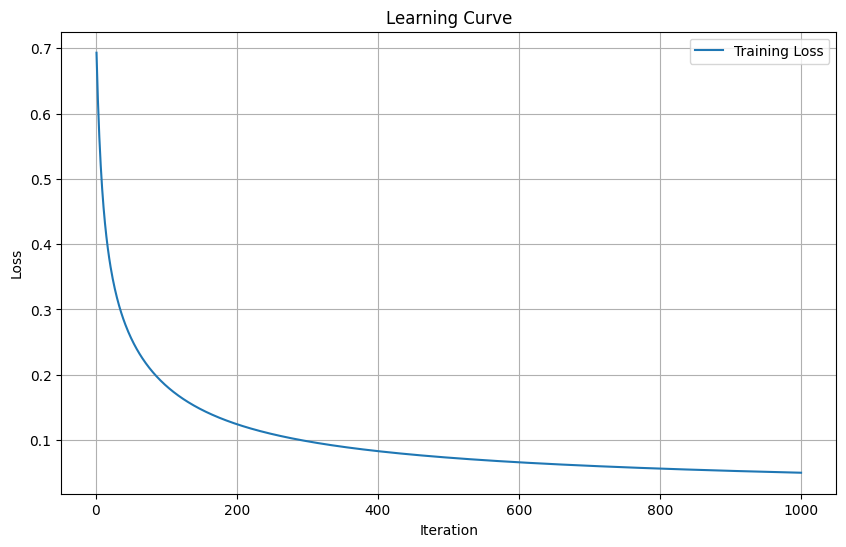

Evaluation Metrics:

Accuracy: Scratch=0.8000, Scikit-learn=0.8000
Precision: Scratch=0.7000, Scikit-learn=0.7000
Recall: Scratch=0.8750, Scikit-learn=0.8750


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter versicolor (1) and virginica (2) classes
mask = y > 0
X = X[mask]
y = y[mask] - 1  # Convert to binary (0: versicolor, 1: virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ScratchLogisticRegression model
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
scratch_model.fit(X_train, y_train)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.loss, label='Training Loss')
if np.any(scratch_model.val_loss):
    plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Predict using the ScratchLogisticRegression model
y_pred_scratch = scratch_model.predict(X_test)

# Initialize and train the scikit-learn LogisticRegression model
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predict using the scikit-learn LogisticRegression model
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate both models
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
}

print("Evaluation Metrics:\n")
for metric_name, metric_func in metrics.items():
    scratch_score = metric_func(y_test, y_pred_scratch)
    sklearn_score = metric_func(y_test, y_pred_sklearn)
    print(f"{metric_name}: Scratch={scratch_score:.4f}, Scikit-learn={sklearn_score:.4f}")


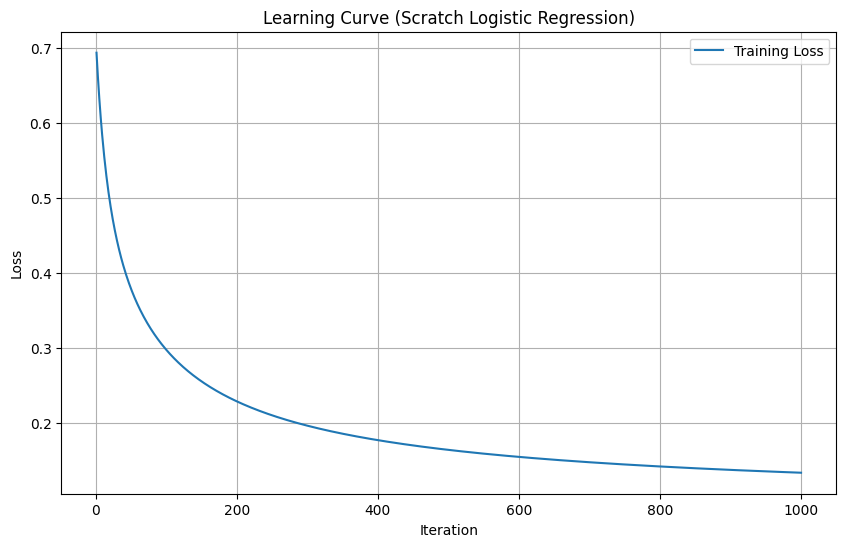

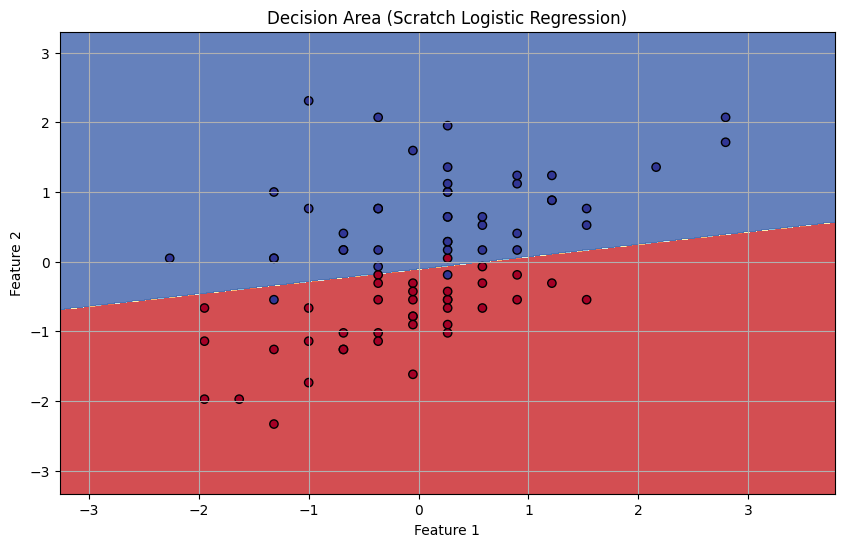

Evaluation Metrics:

Accuracy: Scratch=0.8000, Scikit-learn=0.8000
Precision: Scratch=0.7500, Scikit-learn=0.7500
Recall: Scratch=0.7500, Scikit-learn=0.7500


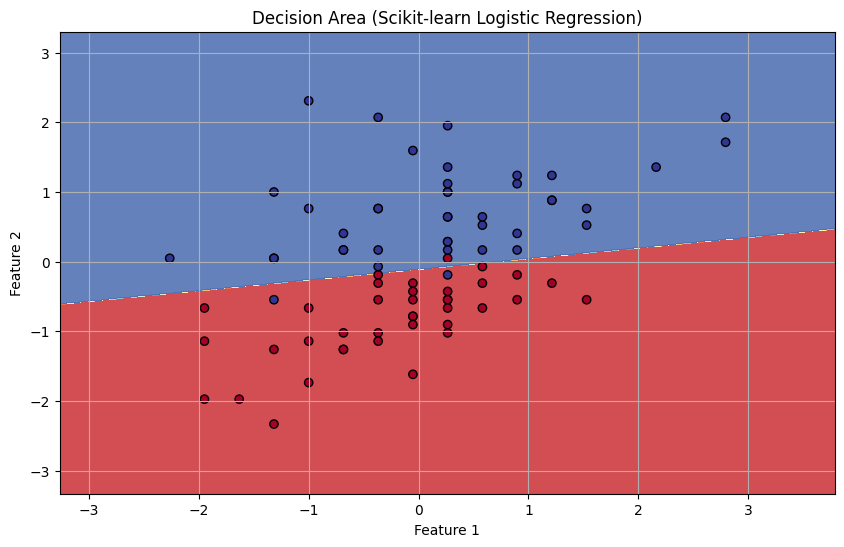

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter versicolor (1) and virginica (2) classes
mask = y > 0
X = X[mask]
y = y[mask] - 1  # Convert to binary (0: versicolor, 1: virginica)

# Select two features for visualization (sepal width and petal length)
X = X[:, [1, 2]]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ScratchLogisticRegression model
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
scratch_model.fit(X_train, y_train)

# Plot the learning curve for ScratchLogisticRegression
plt.figure(figsize=(10, 6))
plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.loss, label='Training Loss')
if np.any(scratch_model.val_loss):
    plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve (Scratch Logistic Regression)')
plt.legend()
plt.grid()
plt.show()

# Visualize the decision area
def plot_decision_regions(X, y, model, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
    plt.show()

# Plot decision boundary for ScratchLogisticRegression
plot_decision_regions(X_train, y_train, scratch_model, title='Decision Area (Scratch Logistic Regression)')

# Initialize and train the scikit-learn LogisticRegression model
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predict using the scikit-learn LogisticRegression model
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate both models
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
}

print("Evaluation Metrics:\n")
for metric_name, metric_func in metrics.items():
    scratch_score = metric_func(y_test, scratch_model.predict(X_test))
    sklearn_score = metric_func(y_test, y_pred_sklearn)
    print(f"{metric_name}: Scratch={scratch_score:.4f}, Scikit-learn={sklearn_score:.4f}")

# Plot decision boundary for scikit-learn LogisticRegression
plot_decision_regions(X_train, y_train, sklearn_model, title='Decision Area (Scikit-learn Logistic Regression)')


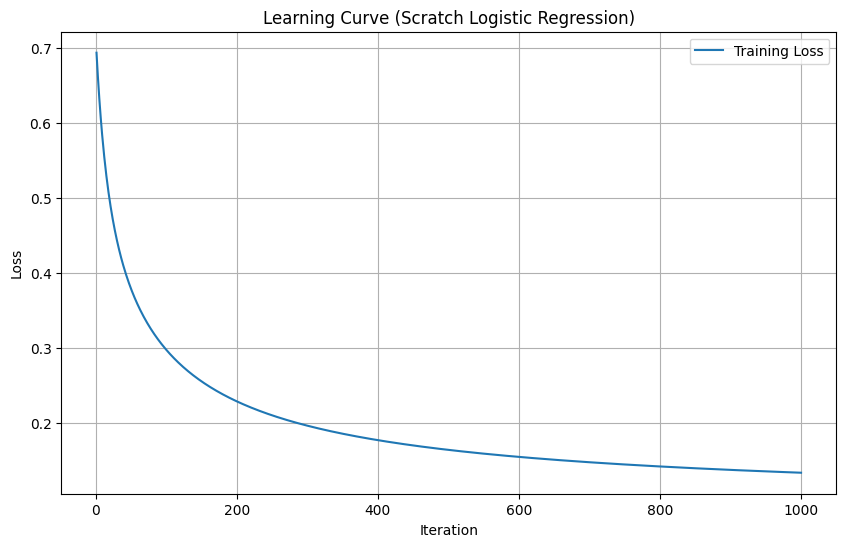

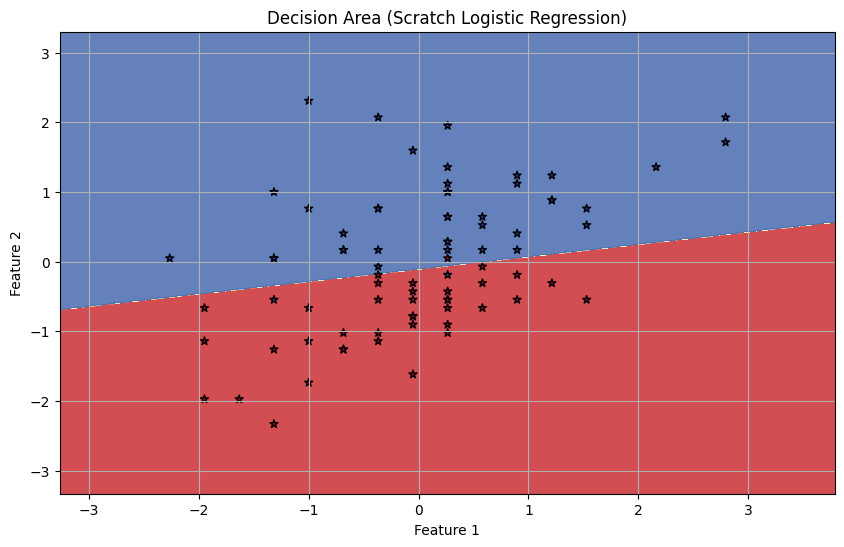

Evaluation Metrics:

Accuracy: Scratch=0.8000, Scikit-learn=0.8000
Precision: Scratch=0.7500, Scikit-learn=0.7500
Recall: Scratch=0.7500, Scikit-learn=0.7500


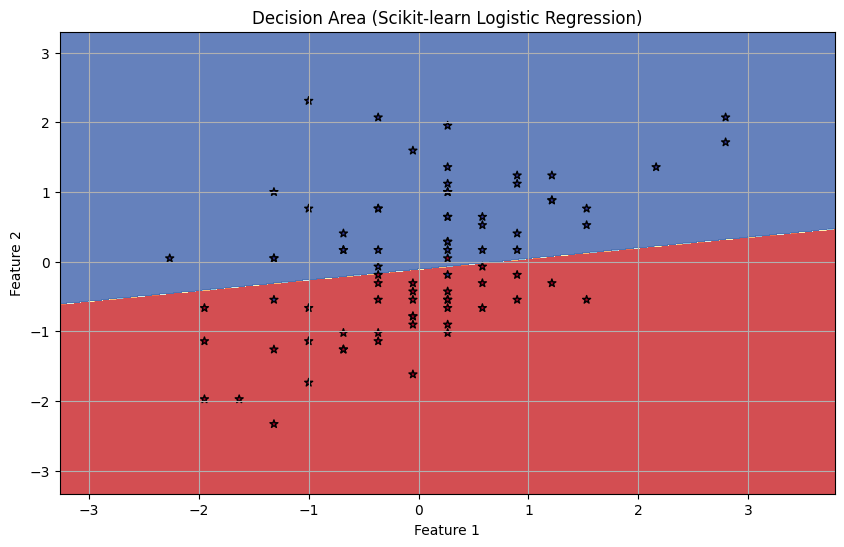

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter versicolor (1) and virginica (2) classes
mask = y > 0
X = X[mask]
y = y[mask] - 1  # Convert to binary (0: versicolor, 1: virginica)

# Select two features for visualization (sepal width and petal length)
X = X[:, [1, 2]]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ScratchLogisticRegression model
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
scratch_model.fit(X_train, y_train)

# Plot the learning curve for ScratchLogisticRegression
plt.figure(figsize=(10, 6))
plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.loss, label='Training Loss')
if hasattr(scratch_model, 'val_loss') and np.any(scratch_model.val_loss):
    plt.plot(range(1, scratch_model.num_iter + 1), scratch_model.val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve (Scratch Logistic Regression)')
plt.legend()
plt.grid()
plt.show()

# Visualize the decision area
def plot_decision_regions(X, y, model, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='*', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
    plt.show()

# Plot decision boundary for ScratchLogisticRegression
plot_decision_regions(X_train, y_train, scratch_model, title='Decision Area (Scratch Logistic Regression)')

# Initialize and train the scikit-learn LogisticRegression model
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predict using the scikit-learn LogisticRegression model
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate both models
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
}

print("Evaluation Metrics:\n")
for metric_name, metric_func in metrics.items():
    scratch_score = metric_func(y_test, scratch_model.predict(X_test))
    sklearn_score = metric_func(y_test, y_pred_sklearn)
    print(f"{metric_name}: Scratch={scratch_score:.4f}, Scikit-learn={sklearn_score:.4f}")

# Plot decision boundary for scikit-learn LogisticRegression
plot_decision_regions(X_train, y_train, sklearn_model, title='Decision Area (Scikit-learn Logistic Regression)')
